In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image
from transform_factory import resize_322, center_crop_224
from captum.attr import visualization as viz
import torch

In [4]:
seed = 0
# expl_method = "LayerDL"
expl_method = "GradCAM"
data_num = 0
dataset = "center_crop_224"
orig_input_method = "center_crop_224"
alpha = 0.05
idx = int(alpha // 0.05) - 1

In [5]:
with open(f"./val_{dataset}_seed_{seed}.npy", "rb") as f:
    filepath_list = np.load(f)

for filepath in filepath_list[data_num:data_num+1]:
    print(filepath)
    img_name = os.path.basename(filepath)
    print(img_name)

    results_path = f"results/val_seed_{seed}_dataset_{dataset}_orig_input_method_{orig_input_method}_pred_orig_eval_orig_transform_both_sign_all_reduction_sum/{img_name}_expl_{expl_method}_sample_2000_sigma_0.05_seed_{seed}_results.pkl"

    with open(results_path, "rb") as f:
        results = np.load(f, allow_pickle=True)

/home/juhyeon/Imagenet/val/n04127249/ILSVRC2012_val_00024718.JPEG
ILSVRC2012_val_00024718.JPEG


In [6]:
orig_expl = results[idx]['orig_expl']

print(orig_expl.min(), orig_expl.max())

tensor(-0.0474) tensor(1.2092)


tensor(0.9489)


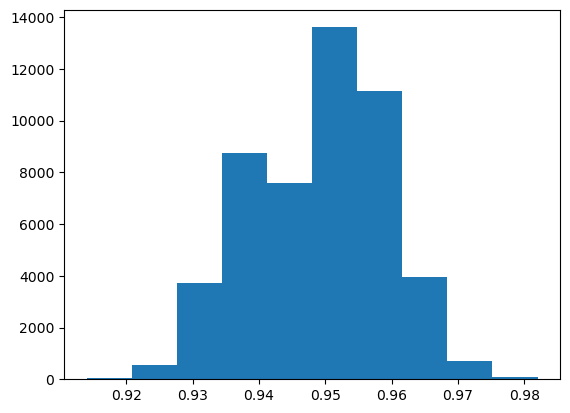

In [7]:
plt.hist(results[idx]['coverage_prob'].flatten())
# plt.xlim(0, 1, 0.05)

print(results[idx]['coverage_prob'].flatten().mean())

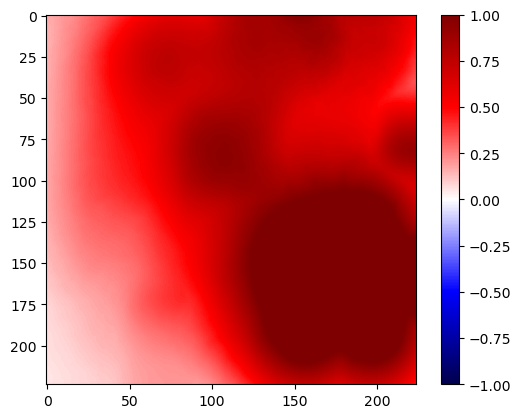

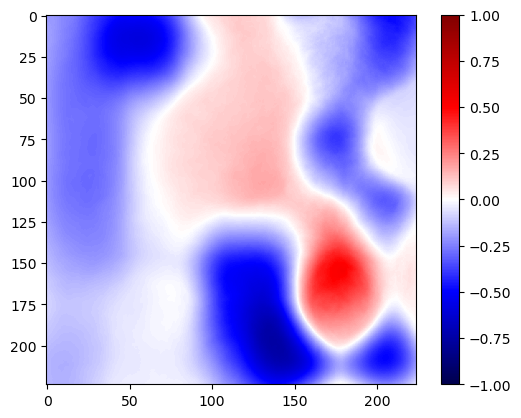

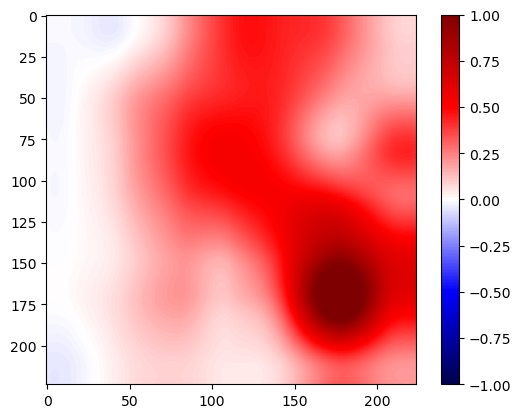

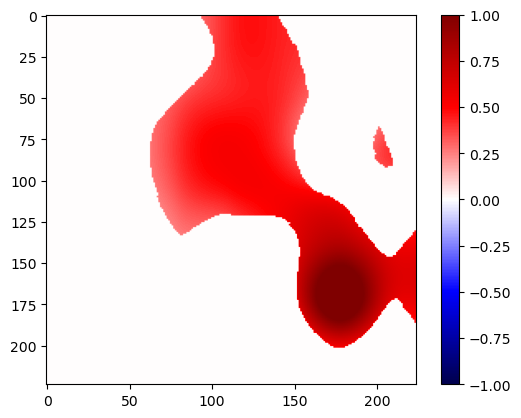

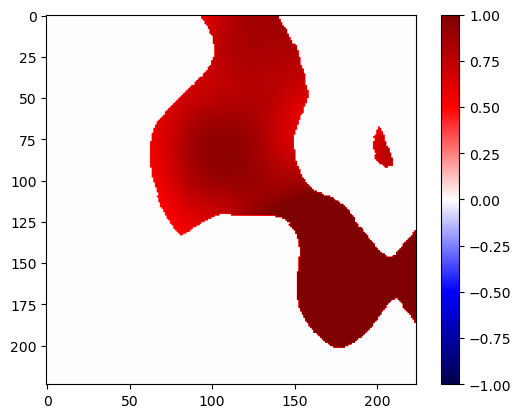

tensor([[False, False, False,  ...,  True,  True,  True],
        [False, False, False,  ...,  True,  True,  True],
        [False, False, False,  ...,  True,  True,  True],
        ...,
        [ True,  True,  True,  ...,  True,  True,  True],
        [ True,  True,  True,  ...,  True,  True,  True],
        [ True,  True,  True,  ...,  True,  True,  True]])



In [8]:
plt.imshow(results[idx]['conf_high'].squeeze(), cmap="seismic")
plt.clim(-1, 1)
plt.colorbar()
plt.show()

plt.imshow(results[idx]['conf_low'].squeeze(), cmap="seismic")
plt.clim(-1, 1)

plt.colorbar()
plt.show()

plt.imshow(results[idx]['orig_expl'].squeeze(), cmap="seismic")
plt.clim(-1, 1)

plt.colorbar()
plt.show()

# plt.imshow(results[1]['cal_average'].squeeze(), cmap='seismic')
# plt.clim(-1, 1)
# plt.colorbar()
# plt.show()

# plt.imshow(results[1]['val_average'].squeeze(), cmap='seismic')
# plt.clim(-1, 1)
# plt.colorbar()
# plt.show()

mask = torch.where(torch.logical_and(results[idx]['conf_high'] > 0, results[idx]['conf_low'] < 0), torch.zeros_like(results[idx]['orig_expl']), 1)

plt.imshow((results[idx]['orig_expl'] * mask).squeeze(), cmap='seismic')
plt.clim(-1, 1)
plt.colorbar()
plt.show()

plt.imshow((results[idx]['conf_high'] * mask).squeeze(), cmap='seismic')
plt.clim(-1, 1)
plt.colorbar()
plt.show()


print((results[idx]['orig_expl'] * mask).squeeze().argsort(descending=True) == (results[idx]['conf_high'] * mask).squeeze().argsort(descending=True))
print()



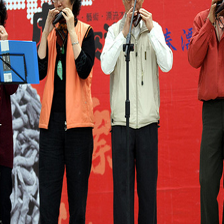

In [11]:
center_crop_224(resize_322(Image.open(filepath_list[data_num])))


In [26]:
conf_high = results[1]['conf_high'].squeeze()
conf_low = results[1]['conf_low'].squeeze()
orig_expl = results[1]['orig_expl']

print(224 * 224)
print(torch.where(torch.logical_and(orig_expl < 0, conf_high > 0))[0].shape)
print(torch.where(torch.logical_and(orig_expl < 0, conf_high < 0))[0].shape)

print(torch.where(torch.logical_and(orig_expl > 0, conf_low > 0))[0].shape)
print(torch.where(torch.logical_and(orig_expl > 0, conf_low < 0))[0].shape)



np_idx = torch.where(torch.logical_and(orig_expl < 0, conf_high > 0))



50176
torch.Size([4366])
torch.Size([0])
torch.Size([22177])
torch.Size([23633])


: 

In [24]:
(conf_high - conf_low).mean()

tensor(0.4795)

In [11]:
print(np_idx)

for r, c in zip(np_idx[0], np_idx[1]):
    print(orig_expl[r, c], conf_high[r, c])

(tensor([  0,   0,   0,  ..., 223, 223, 223]), tensor([23, 24, 25,  ...,  5,  6,  7]))
tensor(-0.0013) tensor(0.0266)
tensor(-0.0027) tensor(0.0220)
tensor(-0.0041) tensor(0.0202)
tensor(-0.0056) tensor(0.0208)
tensor(-0.0070) tensor(0.0256)
tensor(-0.0085) tensor(0.0292)
tensor(-0.0099) tensor(0.0348)
tensor(-0.0113) tensor(0.0413)
tensor(-0.0127) tensor(0.0478)
tensor(-0.0140) tensor(0.0535)
tensor(-0.0152) tensor(0.0604)
tensor(-0.0163) tensor(0.0677)
tensor(-0.0172) tensor(0.0753)
tensor(-0.0181) tensor(0.0823)
tensor(-0.0188) tensor(0.0902)
tensor(-0.0193) tensor(0.0980)
tensor(-0.0196) tensor(0.1059)
tensor(-0.0198) tensor(0.1134)
tensor(-0.0197) tensor(0.1212)
tensor(-0.0194) tensor(0.1288)
tensor(-0.0188) tensor(0.1362)
tensor(-0.0180) tensor(0.1436)
tensor(-0.0169) tensor(0.1508)
tensor(-0.0155) tensor(0.1576)
tensor(-0.0138) tensor(0.1647)
tensor(-0.0118) tensor(0.1717)
tensor(-0.0098) tensor(0.1786)
tensor(-0.0079) tensor(0.1852)
tensor(-0.0061) tensor(0.1918)
tensor(-0.0042

In [10]:
true_expls = torch.load("true_expls.pt")

SyntaxError: invalid syntax (2556777174.py, line 1)

In [13]:
true_expls = torch.stack(true_expls)

In [14]:
true_expls.shape

torch.Size([1000, 1, 224, 224])

In [9]:
plt.imshow(true_expls[1].squeeze().cpu())

NameError: name 'true_expls' is not defined